In [1]:
import pandas as pd
import numpy as np

In [2]:
labels = ['gender']#, 'age', 'ethnicity', 'region']
methods = ['celf', 'imm', 'simpath', 'tim', 'mip/base1000', 'fairmip/fairseed/base100','fairgap/random','fairgap/greedy','fairgap/Gonzalez','fairgap/naive-myopic','fairgap/myopic', 'fairmip/maxmin/base100', 'fairim/maximin','fairim/dc','fairmip/mean/base100']
coverage = []
coverage_std = []
gini = []
gini_std = []
kld_m = []
kld_m_std = []
kld_f = []
kld_f_std = []
for label in labels:
    for method in methods:
        result = pd.read_csv('/Users/golnoosh/Projects/Golnoosh/Fair_IM/Git/influence_maximization/experiments/im500/results/evaluator/'+label+'/'+method+'.txt', sep = '\t')
        coverage.append(np.mean(result['Coverage_all']))
        coverage_std.append(np.std(result['Coverage_all']))
        gini.append(np.mean(result['Gini_all']))
        gini_std.append(np.std(result['Gini_all']))
        kld_m.append(np.mean(result['KLD_male']))
        kld_m_std.append(np.std(result['KLD_male']))
        kld_f.append(np.mean(result['KLD_female']))
        kld_f_std.append(np.std(result['KLD_female']))
    

In [3]:
result

,Graph_num,Num_all,Num_male,Num_female,Coverage_all,Coverage_male,Coverage_female,KLD_all,KLD_male,KLD_female,Gini_all,Gini_male,Gini_female
0,0,500,255,245,0.155213,0.159976,0.150256,0.0,0.038879,0.057088,0.647861,0.631667,0.662913
1,1,500,257,243,0.148326,0.146618,0.150132,0.0,0.043448,0.048465,0.677653,0.676945,0.676574
2,2,500,252,248,0.149302,0.155539,0.142964,0.0,0.037841,0.036265,0.646285,0.652280,0.638567
3,3,500,255,245,0.149928,0.149108,0.150782,0.0,0.041762,0.048373,0.659874,0.652650,0.665527
4,4,500,251,249,0.147517,0.148394,0.146633,0.0,0.023841,0.032604,0.667096,0.656342,0.677519
5,5,500,255,245,0.164995,0.163114,0.166953,0.0,0.044855,0.054034,0.619101,0.608718,0.628265
6,6,500,255,245,0.151812,0.153391,0.150168,0.0,0.033829,0.036938,0.648969,0.651722,0.645671
7,7,500,250,250,0.154281,0.157615,0.150948,0.0,0.040117,0.031478,0.633253,0.626302,0.639489
8,8,500,222,278,0.151421,0.151008,0.151750,0.0,0.036527,0.021774,0.671997,0.677364,0.667402
9,9,500,243,257,0.148800,0.140741,0.156419,0.0,0.036684,0.026162,0.644436,0.674400,0.614531


<BarContainer object of 5 artists>

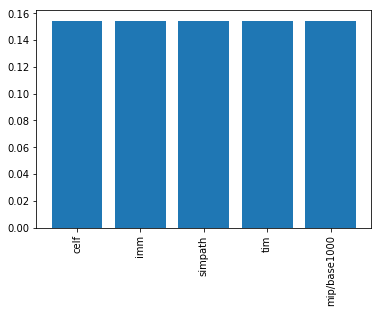

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.xticks(rotation=90)
plt.bar(methods[0:5], coverage[0:5])

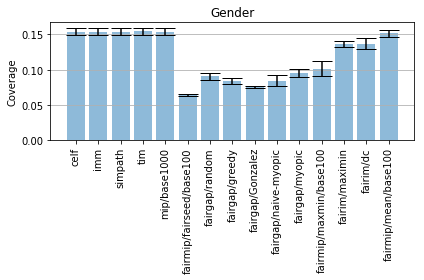

In [5]:
fig, ax = plt.subplots()
ax.bar(methods, coverage, yerr=coverage_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coverage')
ax.set_xticks(methods)
plt.xticks(rotation=90)


#ax.set_xlabel('IM methods')
ax.set_title('Gender')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

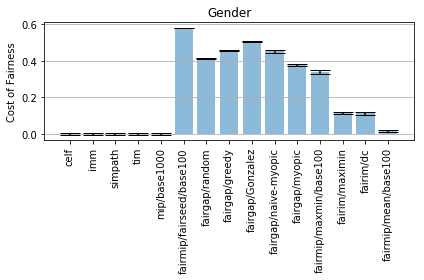

In [6]:
cost = [1-(x / coverage[0]) for x in coverage]
fig, ax = plt.subplots()
ax.bar(methods, cost, yerr=coverage_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Cost of Fairness')
ax.set_xticks(methods)
plt.xticks(rotation=90)

#ax.set_xlabel('IM methods')
ax.set_title('Gender')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

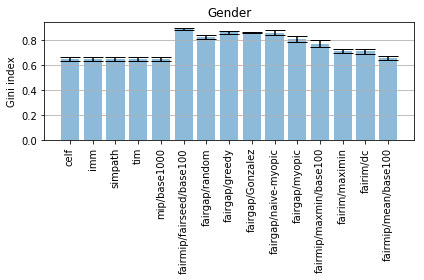

In [7]:
fig, ax = plt.subplots()
ax.bar(methods, gini, yerr=gini_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Gini index')
ax.set_xticks(methods)
plt.xticks(rotation=90)
#ax.set_xlabel('IM methods')
ax.set_title('Gender')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

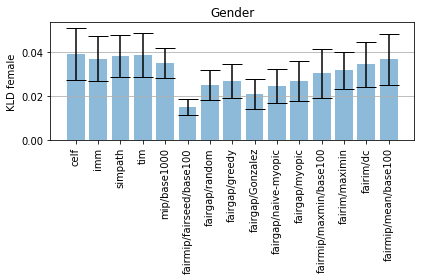

In [8]:
fig, ax = plt.subplots()
ax.bar(methods, kld_f, yerr=kld_f_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('KLD female')
ax.set_xticks(methods)
plt.xticks(rotation=90)

#ax.set_xlabel('IM methods')
ax.set_title('Gender')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

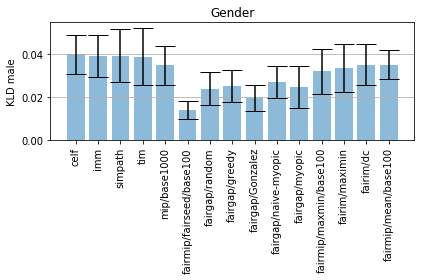

In [9]:
fig, ax = plt.subplots()
ax.bar(methods, kld_m, yerr=kld_m_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('KLD male')
ax.set_xticks(methods)
plt.xticks(rotation=90)
#ax.set_xlabel('IM methods')
ax.set_title('Gender')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()